This notebook is not used, but if I wanted to use it I'll need to import data_full

In [1]:
import pandas as pd

In [ ]:
# This view part is now irrelvant because I only kept one article view per user
views = df_full.ID_User.value_counts()
view_df = pd.DataFrame({'views' : views})
view_df.index.name = 'ID_User'
view_df.columns

Index(['views'], dtype='object')

In [ ]:
views.describe(percentiles = [.01, .10, .25, .5, .75, .90, .95, .96, .97, .98, .99, .998, .999])

count   138306.00
mean        65.75
std         85.11
min          1.00
1%           1.00
10%          3.00
25%         10.00
50%         35.00
75%         89.00
90%        170.00
95%        234.00
96%        255.00
97%        282.00
98%        321.00
99%        389.00
99.8%      553.00
99.9%      631.00
max       2246.00
Name: ID_User, dtype: float64

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


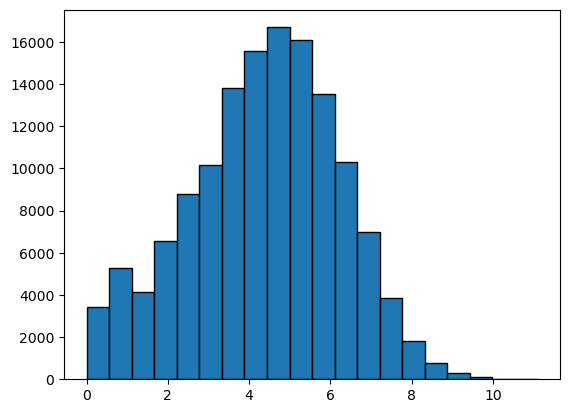

In [ ]:
# box-cox transform
from numpy.random import seed
from numpy.random import randn
from numpy import exp
from scipy.stats import boxcox
from matplotlib import pyplot
# seed the random number generator
seed(1)
# power transform
views_trans = pd.Series(boxcox(views, 0))
# histogram
pyplot.hist(views_trans, edgecolor = 'black', bins = 20)
pyplot.show()

In [ ]:
views_trans.describe()

count    138306.000000
mean          4.356284
std           1.854183
min           0.000000
25%           3.135494
50%           4.488636
75%           5.666427
max          11.101130
dtype: float64

In [ ]:
math.exp(views_trans.mean() + 2.5*views_trans.std())

8036.450341424565

In [ ]:
highest_user = view_df.loc[view_df.views >= 66246,].index

In [ ]:
highest_user_clicks = df_full.loc[df_full.ID_User.isin(highest_user),]

In [ ]:
print(highest_user_clicks.SID_Content.nunique())
print(highest_user_clicks.head())

131
          ID_Day  ID_Visit  PiNr  ID_Click                 ID  ID_Time  \
15113453    7980      1322   407     28115  20211106003345030      848   
15113454    7979       612   160     14366  20211105007328748     1362   
15113455    7979       612   176     14382  20211105007341199     1364   
15113456    7979       612   177     14383  20211105007341292     1364   
15113457    7979       612   178     14384  20211105007341474     1364   

                       Cookie  SID_Content  SID_Produkt  SID_ObjectType  \
15113453 -3239852258164323768      3365729            2               8   
15113454 -3239852258164323768      3365729            7               8   
15113455 -3239852258164323768      3365729            7               8   
15113456 -3239852258164323768      3365729            7               8   
15113457 -3239852258164323768      3365729            7               8   

          SID_MediaType  IsBounce  IsExit  IsPosting  IsUser  IsReload  \
15113453              2   

Remove 1% of users which represents users with more than 3873 total views (129 views per day)

In [ ]:
high_users = view_df.loc[view_df.views > 3873,].index

In [ ]:
print(view_df.loc[view_df.views > 3873,].sum())
print((view_df.loc[view_df.views > 3873,].sum())/len(df_full))

views    10212785
dtype: int64
views    0.21814
dtype: float64


In [ ]:
df_full = df_full.loc[-df_full.ID_User.isin(high_users),]
df_full.shape

(10216658, 29)